matplotlib.pyplot: 用來繪製影像
sklearn.datasets: 用來繪入內建之手寫數字資料庫
sklearn.svm: SVM 支持向量機之演算法物件
sklearn.metrics: 用來評估辨識準確度以及報表的顯示

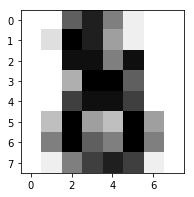

In [78]:

from sklearn import datasets,svm,metrics
import matplotlib.pyplot as plt

digits = datasets.load_digits()

plt.figure(1,figsize=(3,3))
plt.imshow(digits.images[-1],plt.cm.gray_r)
plt.show()

In [79]:
for key,value in digits.items():
        try:
            print key,value.shape
        except:
            print key

images (1797, 8, 8)
data (1797, 64)
target_names (10,)
DESCR DESCR
target (1797,)


('images', (1797L, 8L, 8L))	共有 1797 張影像，影像大小為 8x8
('data', (1797L, 64L))	data 則是將8x8的矩陣攤平成64個元素之一維向量
('target_names', (10L,))	說明10種分類之對應 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
DESCR	資料之描述
('target', (1797L,))	記錄1797張影像各自代表那一個數字

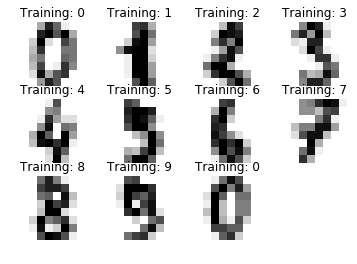

In [80]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[0:11]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [86]:
n_sample = len(digits.images)
# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_sample,-1))
# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)
# 用前半部份的資料來訓練
classifier.fit(data[:n_sample/2],digits.target[:n_sample/2])
expected = digits.target[n_samples / 2:]
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])

In [92]:
print("confusion metrics:\n%s" %metrics.confusion_matrix(expected,predicted))

confusion metrics:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


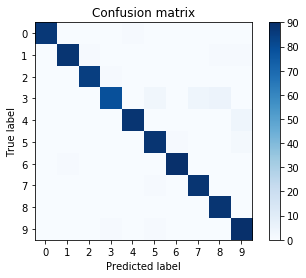

In [119]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=0)
    plt.yticks(tick_marks, digits.target_names)
    #plt.tight_layout()
    plt.colorbar()
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [120]:
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


